In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [40]:
 df.describe

<bound method NDFrame.describe of         Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price 

In [41]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [42]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [43]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [44]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [45]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [46]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [47]:
df['duration'].max()

49.83

In [48]:
df['duration'].min()

0.83

In [49]:
df['duration'].describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

## PreProcessing 

In [50]:
df = df.drop('Unnamed: 0', axis=1)

In [51]:
df = df.drop('flight', axis=1)

In [52]:
df['class'] = df['class'].apply(lambda x:1 if x == 'Business' else 0)

In [53]:
pd.factorize(df.stops)

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Index(['zero', 'one', 'two_or_more'], dtype='object'))

In [54]:
df = df.join(pd.get_dummies(df.airline, prefix ='airline').astype(int)).drop('airline', axis=1)

In [55]:
df = df.join(pd.get_dummies(df.source_city, prefix = 'source').astype(int)).drop('source_city', axis = 1)
df = df.join(pd.get_dummies(df.departure_time, prefix = 'departure').astype(int)).drop('departure_time', axis = 1)
df = df.join(pd.get_dummies(df.arrival_time, prefix = 'arrival').astype(int)).drop('arrival_time', axis = 1)
df = df.join(pd.get_dummies(df.destination_city, prefix = 'dest').astype(int)).drop('destination_city', axis = 1)

In [56]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,dest_Bangalore,dest_Chennai,dest_Delhi,dest_Hyderabad,dest_Kolkata,dest_Mumbai
0,zero,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,zero,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,zero,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,zero,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,zero,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,one,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
300149,one,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
300150,one,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
300151,one,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


# Training Regression Model

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X, y = df.drop('price', axis =1 ), df.price

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
X_train['stops'] = X_train['stops'].astype(str)
X_train['stops'] = X_train['stops'].str.strip().str.lower()
X_train['stops'] = X_train['stops'].replace({'one': 1, 'zero': 0})
print(X_train['stops'].unique())


[1 0 'two_or_more']


In [60]:
X_train['stops'] = pd.to_numeric(X_train['stops'], errors='coerce')
X_train['stops'] = X_train['stops'].fillna(0)  # or another value/method
print(X_train['stops'].unique())


[1. 0.]


In [61]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [62]:
# Convert 'stops' column in X_test (if applicable)
X_test['stops'] = X_test['stops'].astype(str).str.strip().str.lower()
X_test['stops'] = X_test['stops'].replace({'one': 1, 'zero': 0})
X_test['stops'] = pd.to_numeric(X_test['stops'], errors='coerce').fillna(0)  # Handle NaN if necessary


y_test = y_test.replace({'one': 1, 'zero': 0})
y_test = pd.to_numeric(y_test, errors='coerce').fillna(0)  # Convert to numeric and handle NaN if necessary


print(X_test.dtypes)
print(y_test.dtypes)

stops                      float64
class                        int64
duration                   float64
days_left                    int64
airline_AirAsia              int32
airline_Air_India            int32
airline_GO_FIRST             int32
airline_Indigo               int32
airline_SpiceJet             int32
airline_Vistara              int32
source_Bangalore             int32
source_Chennai               int32
source_Delhi                 int32
source_Hyderabad             int32
source_Kolkata               int32
source_Mumbai                int32
departure_Afternoon          int32
departure_Early_Morning      int32
departure_Evening            int32
departure_Late_Night         int32
departure_Morning            int32
departure_Night              int32
arrival_Afternoon            int32
arrival_Early_Morning        int32
arrival_Evening              int32
arrival_Late_Night           int32
arrival_Morning              int32
arrival_Night                int32
dest_Bangalore      

In [63]:
reg.score(X_test, y_test)

0.9852137908827322

In [64]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)
print("R2 :",  r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))

R2 : 0.9852137908827322
MAE: 1080.15581598284
MSE: 7607496.7440725695
RMSE: 2758.169092726653


Text(0.5, 1.0, 'Actual Flight price vs Predicted Flight Price')

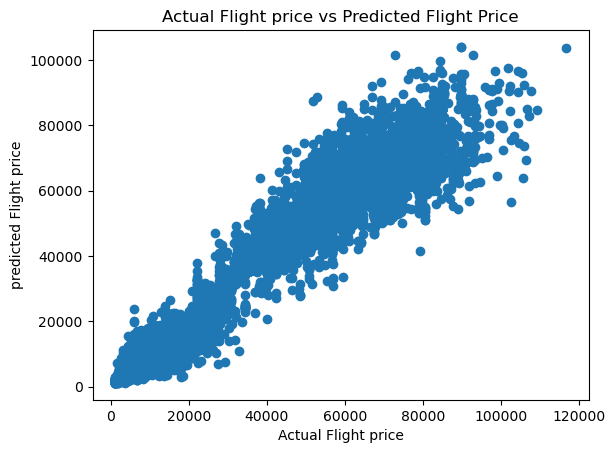

In [65]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight price")
plt.ylabel("predicted Flight price")
plt.title("Actual Flight price vs Predicted Flight Price")

In [66]:
importance = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importance = sorted(importance.items(), key=lambda x:x[1], reverse=True)
sorted_importance

[('class', 0.8802056278887417),
 ('duration', 0.057095348359470104),
 ('days_left', 0.0185859700058696),
 ('airline_Vistara', 0.004995958162111289),
 ('airline_Air_India', 0.004988566132018166),
 ('source_Delhi', 0.004009301826618942),
 ('dest_Delhi', 0.0035377937362094597),
 ('source_Mumbai', 0.0021655359939305777),
 ('dest_Kolkata', 0.0018610469253112249),
 ('stops', 0.0018353768873334395),
 ('dest_Mumbai', 0.0018346802672961637),
 ('source_Kolkata', 0.0016807387281773788),
 ('dest_Hyderabad', 0.0015806251554026504),
 ('arrival_Evening', 0.0014116956570351224),
 ('source_Hyderabad', 0.0012839159214689119),
 ('arrival_Night', 0.0011518859080221838),
 ('departure_Evening', 0.001126622434210986),
 ('source_Bangalore', 0.0010873925256799015),
 ('dest_Bangalore', 0.0010585217494960897),
 ('arrival_Afternoon', 0.0010561264976553634),
 ('dest_Chennai', 0.0008858235765610325),
 ('departure_Morning', 0.0008714185368341055),
 ('source_Chennai', 0.0008617981860886971),
 ('departure_Early_Mornin

In [67]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

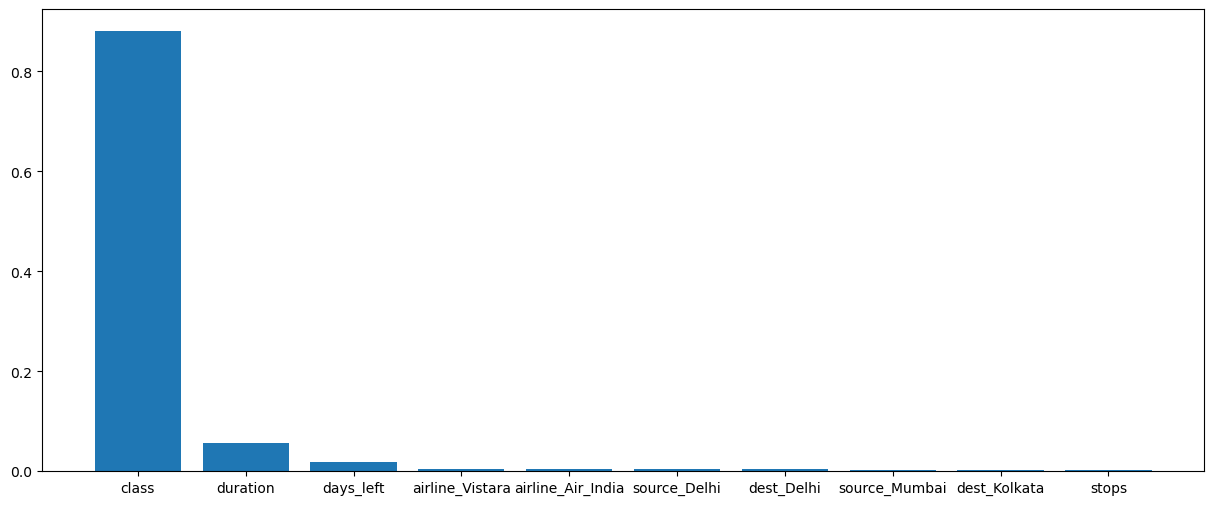

In [68]:
plt.figure(figsize = (15, 6))
plt.bar([x[0] for x in sorted_importance[:10]], [x[1] for x in sorted_importance[:10]])

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestRegressor with n_jobs=-1 to use all cores
reg = RandomForestRegressor(n_jobs=-1, random_state=42)

# Define the parameter grid for GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 5],
    'max_features': ['auto', 'sqrt']
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Output the best parameters
print("Best Parameters:", best_params)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


exception calling callback for <Future at 0x18341895750 state=finished returned list>
Traceback (most recent call last):
  File "D:\03_APPLICATION\Anaconda\Lib\site-packages\joblib\externals\loky\_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "D:\03_APPLICATION\Anaconda\Lib\site-packages\joblib\parallel.py", line 385, in __call__
    self.parallel.dispatch_next()
  File "D:\03_APPLICATION\Anaconda\Lib\site-packages\joblib\parallel.py", line 834, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\03_APPLICATION\Anaconda\Lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\03_APPLICATION\Anaconda\Lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\03_APPLICATION\Anaconda\Lib\site-package

KeyboardInterrupt: 

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators' : randint(100, 300),
    'max_depth' : [None, 10, 20, 30 , 40, 50],
    'min_samples_split' : randint(2, 11),
    'min_samples_leaf' : randint(1,5),
    'max_features' : [1.0, 'auto', 'sqrt'] 
}

reg = RandomForestRegressor(n_jobs=-1)
random_search = RandomizedSearchCV(estimator=reg, param_distributions= param_dist, n_iter=2, cv=3,
                                  scoring ='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)
random_search.fit(X_train, y_train)
best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [73]:
best_regressor.score(X_test, y_test)

0.9860993053569755

In [71]:
import math
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)


print('R2 :', r2_score(y_test, y_pred))
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', math.sqrt(mean_squared_error(y_test, y_pred)))


R2 : 0.9861202318300636
MAE : 1094.0615385553951
MSE : 7141133.357701683
RMSE : 2672.2899089922266
